# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. **Do not forget, this is a Classification problem!**

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Check if is there any overfitting and underfitting. Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Your Name</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values

data_raw = pd.read_csv('winequality.csv')
data_raw.head()
data_raw.info()
data_raw.isna().sum()
data_raw.isnull().sum()
data_raw.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Exploratory Data Analysis

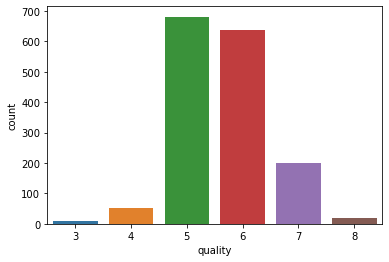

In [21]:
# Our label distribution (countplot)
sns.countplot(x="quality", data=data_raw)

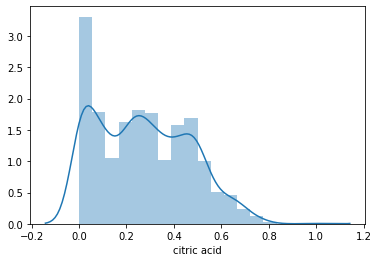

In [5]:
# Example EDA (distplot)
sns.distplot(data_raw["citric acid"])

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [28]:
data_raw.drop_duplicates() # Drop Duplicated values
# Feature Scaling is unnecessary because there are not high values in dataset.
# There is no necessary to create new features. Dataset is enough.
from sklearn.model_selection import train_test_split
# Locate features and label
X, y = data_raw.iloc[: , :-1], data_raw.iloc[: , -1]
#Splitting dataset
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = 102)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import  GridSearchCV
param = [{
    "criterion" : ['gini','entropy'],
    "max_depth" : range(1,10),
    "min_samples_split" : range(1,10),
    "min_samples_leaf" : [1,2,4,5,10,20,30,40,80,100]
}]
decision = DecisionTreeClassifier()

grid = GridSearchCV(estimator=decision,param_grid=param,cv=10,verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 1620 candidates, totalling 16200 fits


C:\Users\batuy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 3824 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 11824 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 16200 out of 16200 | elapsed:   17.3s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(1, 10),
                          'min_samples_leaf': [1, 2, 4, 5, 10, 20, 30, 40, 80,
                                               100],
                          'min_samples_split': range(1, 10)}],
             verbose=1)

In [34]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = grid.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        12
           5       0.65      0.74      0.69       200
           6       0.56      0.57      0.57       199
           7       0.44      0.32      0.37        62
           8       0.00      0.00      0.00         3

    accuracy                           0.59       480
   macro avg       0.27      0.27      0.27       480
weighted avg       0.56      0.59      0.57       480



C:\Users\batuy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))


Precision = 0.27471493647964235
Recall = 0.2734074944615551
Accuracy = 0.5895833333333333
F1 Score = 0.2718339854578888


C:\Users\batuy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


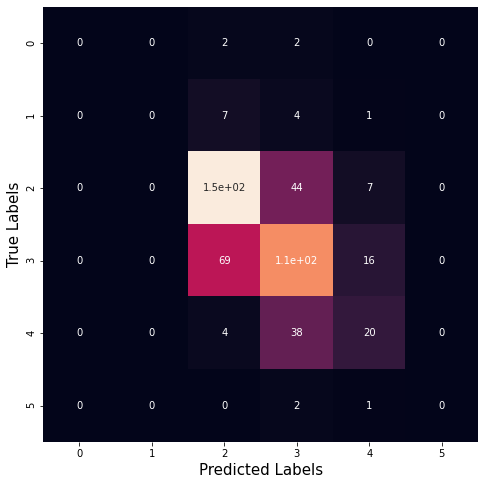

In [36]:
# Confusion Matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.